## Analysis and figure for user facing website
In this notebook, we charactize the ways that different GitHub repository managers display their content on the internet for their users.

First, import necessary packages

In [1]:
from pywaffle import Waffle
import matplotlib.pyplot as plt
import pandas as pd

Read in CSV of data on user facing websites

In [2]:
user_facing = pd.read_csv('data/user_facing_site.csv', header=0)

Get the sum of each type of user facing website

In [3]:
user_facing_totals = user_facing.sum()
print(user_facing_totals)

organization_or_project_name    Darwin CoreEMLEcological Trait Data StandardMI...
only_github                                                                    11
github.io._website                                                              7
html_website                                                                   14
gitbook                                                                         0
dtype: object


Remove header since we'll be renaming this for plotting.

In [4]:
user_facing_new_labels = user_facing_totals.drop("organization_or_project_name")
user_facing_new_labels.head()

only_github           11
github.io._website     7
html_website          14
gitbook                0
dtype: object

Rename header and convert to data frame

In [5]:
user_facing_df = pd.DataFrame({'user_facing_site':user_facing_new_labels.index, 'count':user_facing_new_labels.values})
user_facing_df

,user_facing_site,count
0,only_github,11
1,github.io._website,7
2,html_website,14
3,gitbook,0


In order to make waffle plot, need to make a dictionary using the data above.
I include code that takes counts from df above, and adds them to dictionary directly

In [6]:
user_facing_dict = {'HTML site':user_facing_df.iloc[2,1],'only GitHub':user_facing_df.iloc[0,1],'GitHub.io':user_facing_df.iloc[1,1]}

Make the waffle plot. Using this function you can customize how many rows are displayed, content for a legend, and colors for the tiles.

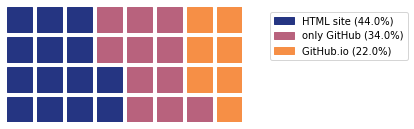

In [7]:
user_waffle = plt.figure(FigureClass=Waffle,
                        rows = 4,
                        values=user_facing_dict,
                        legend={'loc': 'upper left', 'bbox_to_anchor': (1.1, 1)},
                         labels=[f"{k} ({round((v/len(user_facing.index))*100,0)}%)" for k, v in user_facing_dict.items()],
                         colors=['#253582ff','#b8627dff','#f68f46ff']
)
plt.show()